In [186]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [187]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [188]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [189]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [190]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()

# Define the features to be scaled / Drop the index from the DataFrame

features_scale = df_market_data.reset_index(drop=True)



In [191]:
features_scale.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [192]:
coin_ids = df_market_data.index

coin_ids

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

In [193]:
# Fit and transform the data to be scaled

scaled_data = scaler.fit_transform(features_scale)

In [194]:
# Create a DataFrame with the scaled data

scaled_data_df = pd.DataFrame(scaled_data,
                              columns = features_scale.columns)

# Copy the crypto names from the original DataFrame

scaled_data_df["coin_id"] = coin_ids

# Set the coin_id column as index

scaled_data_df = scaled_data_df.set_index("coin_id")

# Display the scaled DataFrame

scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [195]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 11))

In [196]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit(scaled_data_df)
    inertia.append(model.inertia_)

In [197]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data_original = {
    "K" : k,
    "Inertia" : inertia
}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df_original = pd.DataFrame(elbow_data_original)
elbow_df_original.head(10)

,K,Inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


In [198]:
import matplotlib.pyplot as plt

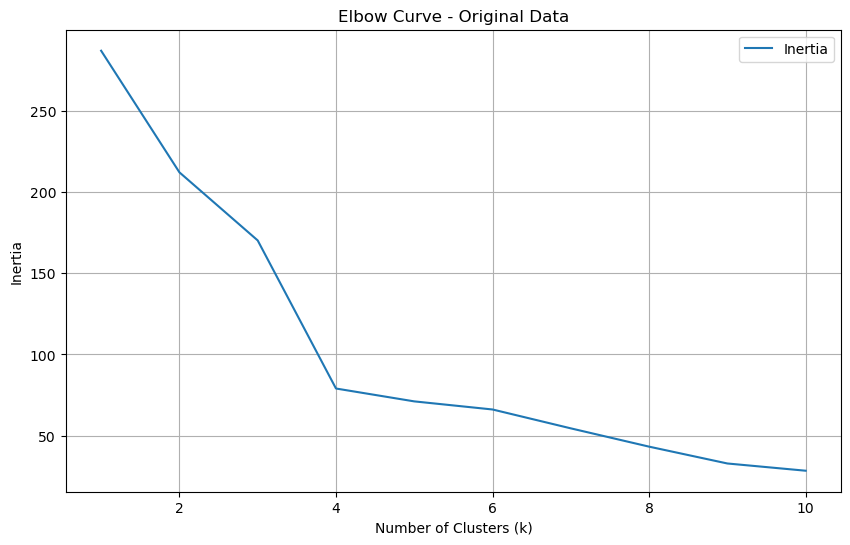

In [199]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

elbow_plot_original = elbow_df_original.plot(

    x = "K", 
    y = "Inertia",
    title = "Elbow Curve - Original Data",
    xlabel = "Number of Clusters (k)",
    ylabel = "Inertia",
    figsize = (10, 6),
    grid = True
)

xticks = k,

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow curve, the best amount of clusters for the original data is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [200]:
# Initialize the K-Means model using the best value for k

model_original = KMeans(n_clusters = 4, random_state = 42)

In [201]:
# Fit the K-Means model using the scaled DataFrame

model_original.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [202]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame

predicted_clusters_original = model_original.predict(scaled_data_df)

# Print the resulting array of cluster values.

print(predicted_clusters_original)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [203]:
# Create a copy of the scaled DataFrame

clusters_df_original = scaled_data_df.copy()

In [204]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters

clusters_df_original["coin_cluster"] = predicted_clusters_original

# Display the copy of the scaled DataFrame

clusters_df_original.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [226]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

original_data_cluster_plot = clusters_df_original.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = "coin_cluster",
    hover_cols = ["coin_id"],
    title = "Cryptocurrency Clusters - Original Data",
    xlabel = "Price Change Percentage (24h)",
    ylabel = "Price Change Percentage (7d)",
    width = 800,
    height = 400
)

# Show the plot

original_data_cluster_plot

:NdOverlay   [coin_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [206]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components = 3)

In [207]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

scaled_data_pca = pca.fit_transform(scaled_data_df)

# View the scaled PCA data

scaled_data_pca[:10]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292]])

In [208]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is around 88.5%, meaning most of the important information was preserved after reducing dimentionality down to 3 components.

In [209]:
# Create a new DataFrame with the PCA data.

scaled_data_pca_df = pd.DataFrame(scaled_data_pca, columns = ["PC 1", "PC 2", "PC 3"])

# Copy the crypto names from the original scaled DataFrame

scaled_data_pca_df["coin_id"] = clusters_df_original.index

# Set the coin_id column as index

scaled_data_pca_df = scaled_data_pca_df.set_index("coin_id")

# Display the scaled PCA DataFrame

scaled_data_pca_df.head(10)


,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [210]:
# Create a list with the number of k-values from 1 to 11

k_pca = list(range(1, 11))

In [211]:
# Create an empty list to store the inertia values

inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k_pca:
    pca_model = KMeans(n_clusters = i, random_state = 42)
    pca_model.fit(scaled_data_pca_df)
    inertia_pca.append(pca_model.inertia_)

In [212]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data_pca = { "K" : k_pca,
                   "Inertia" : inertia_pca }

# Create a DataFrame with the data to plot the Elbow curve

elbow_df_pca = pd.DataFrame(elbow_data_pca)
elbow_df_pca.head(10)

,K,Inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


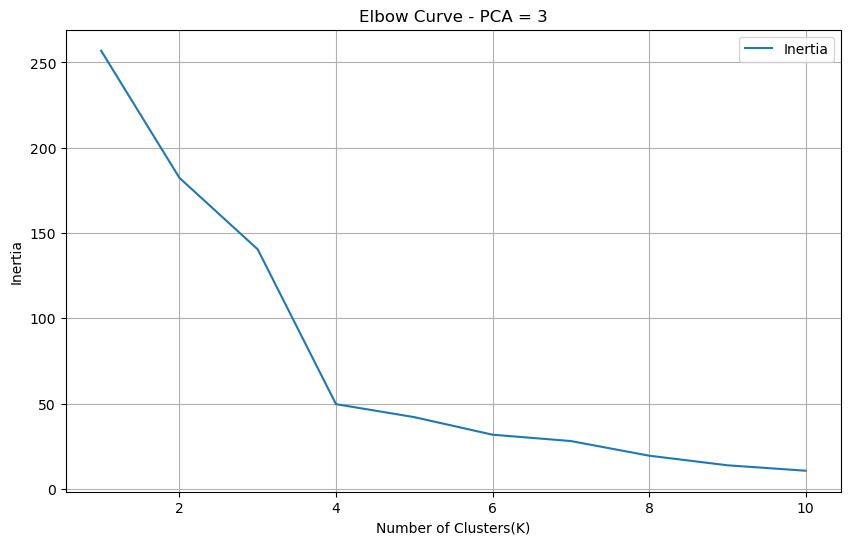

In [213]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

elbow_plot_pca = elbow_df_pca.plot(
    x = "K",
    y = "Inertia",
    title = "Elbow Curve - PCA = 3",
    xlabel = "Number of Clusters(K)",
    ylabel = "Inertia",
    figsize = (10, 6),
    grid = True
)

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Using the PCA data, the best value for "k" is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** While the values of the elbow curve are different, the best value for "k" is still 4. This indicates the underlying structure of the data is preserved well after reducing its dimentionality.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [214]:
# Initialize the K-Means model using the best value for k

kmeans_pca_model = KMeans(n_clusters = 4, random_state = 42)

In [215]:
# Fit the K-Means model using the PCA data
pca_clusters = kmeans_pca_model.fit(scaled_data_pca_df)

In [216]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

pca_clusters = kmeans_pca_model.predict(scaled_data_pca_df)

# Print the resulting array of cluster values.

print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [217]:
# Create a copy of the scaled PCA DataFrame

pca_clusters_df = scaled_data_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

pca_clusters_df["coin_cluster"] = pca_clusters

# Display the copy of the scaled PCA DataFrame

pca_clusters_df.head(10)

,PC 1,PC 2,PC 3,coin_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [228]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

pca_cluster_plot = pca_clusters_df.hvplot.scatter(
    x = "PC 1",
    y = "PC 2",
    by = "coin_cluster",
    hover_cols = ["coin_id"],
    title = "Cryptocurrency Clusters - (PCA = 3, k = 4)",
    xlabel = "Pricinpal Component 1",
    ylabel = "Principal Component 2",
    width = 800,
    height = 400

)

#Show the plot

pca_cluster_plot

:NdOverlay   [coin_cluster]
   :Scatter   [PC 1]   (PC 2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [219]:
# Composite plot to contrast the Elbow curves

elbow_df_original = pd.DataFrame({
    "K": k,
    "Inertia": inertia,
    "Type": "Original Data"
})

elbow_df_pca = pd.DataFrame({
    "K": k_pca,
    "Inertia": inertia_pca,
    "Type": "PCA Data"
})



In [220]:
elbow_df_original.head(10)

,K,Inertia,Type
0,1,287.000000,Original Data
1,2,212.123342,Original Data
2,3,170.193571,Original Data
3,4,79.022435,Original Data
4,5,71.097914,Original Data
5,6,66.108827,Original Data
6,7,54.488123,Original Data
7,8,43.224693,Original Data
8,9,32.860884,Original Data
9,10,28.404885,Original Data


In [221]:
elbow_df_pca.head(10)

,K,Inertia,Type
0,1,256.874086,PCA Data
1,2,182.339530,PCA Data
2,3,140.431833,PCA Data
3,4,49.665497,PCA Data
4,5,42.051901,PCA Data
5,6,31.749005,PCA Data
6,7,28.031869,PCA Data
7,8,19.451747,PCA Data
8,9,13.814082,PCA Data
9,10,10.630648,PCA Data


In [222]:
# Combine the two DataFrames into a single DataFrame

combined_elbow_df = pd.concat([elbow_df_original, elbow_df_pca], axis=0)
combined_elbow_df.head(10)

,K,Inertia,Type
0,1,287.000000,Original Data
1,2,212.123342,Original Data
2,3,170.193571,Original Data
3,4,79.022435,Original Data
4,5,71.097914,Original Data
5,6,66.108827,Original Data
6,7,54.488123,Original Data
7,8,43.224693,Original Data
8,9,32.860884,Original Data
9,10,28.404885,Original Data


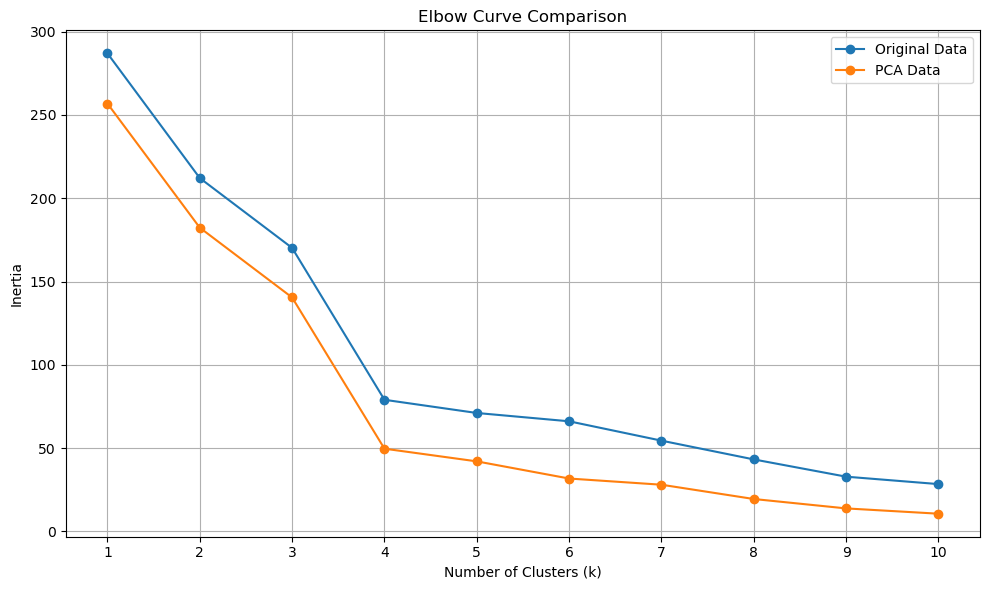

In [223]:
# Combine both dataframes

# combined_elbow_df = pd.concat([elbow_df_original, elbow_df_pca])

# Plot elbow comparison
plt.figure(figsize=(10, 6))

plt.plot(elbow_df_original["K"], elbow_df_original["Inertia"], marker = "o", label = "Original Data")

plt.plot(elbow_df_pca["K"], elbow_df_pca["Inertia"], marker = "o", label = "PCA Data")

plt.title("Elbow Curve Comparison")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [229]:
# Composite plot to contrast the clusters

comparison_plot = original_data_cluster_plot + pca_cluster_plot

comparison_plot

:Layout
   .NdOverlay.I  :NdOverlay   [coin_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [coin_cluster]
      :Scatter   [PC 1]   (PC 2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After applying PCA to reduce the dataset to three components, the results of K-Means clustering stayed pretty consistent. The optimal number of clusters remained 4, as shown by the elbow curve, as was the case when working with the original scaled data.

  PCA-based clusters appeared to be more compact and visually separated. This suggests that using fewer features helps reduce noise and emphasizes the underlying structure of this data. Overall, PCA helped simplify the data while maintaining about 88.5% of the variance, hence preserving the most important components. In conclusion, using PCA can improve our ability to interpret K-Means clustering while making our models perform better.